# Predição de Vendas - Regressão Linear Simples e Múltipla



##### O Dataset:
A base de dados conta com os canais utilizados para realizar uma propaganda, e o quanto cada canal vendeu de acordo com o valor investido na propaganda

##### Problema de estudo:
Realizar a predição de vendas baseado nas variáveis presentes no dataset.


### Apresentação da base de dados:

In [88]:
import warnings
warnings.filterwarnings('ignore') #Suspender os 'Warnings' no output do código

import pandas as pd #Para trabalhar com DataFrames
import numpy as np #Álgebra


#Visualização de Dabsados

import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
#Carregando a base de dados
propaganda = pd.read_csv('advertising.csv')
propaganda.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Análise Exploratória e Limpeza de Dados:

In [3]:
propaganda.shape

(200, 4)

In [90]:
propaganda.info()
#Obs: Todas as varáveis são qualitativas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
propaganda.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
propaganda.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Utilizo o "pairplot" para verificar visualmente a possível correlação entre variáveis:

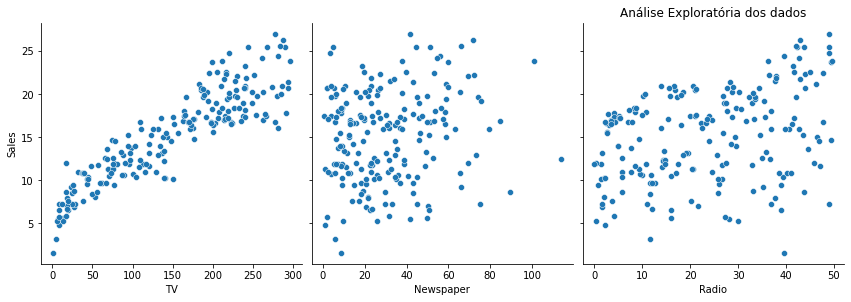

In [7]:
sns.pairplot(propaganda, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind= 'scatter')
plt.title('Análise Exploratória dos dados')
plt.show()

Mesmo ainda não plotando uma matriz de correlação, já consigo perceber uma tendência linear nas variáveis 'Sales' e 'TV'. Vou utilizar uma matriz de Correlação de Pearson para verificar como uma variável se comporta na presença de outra, e qual é o nível de correlação das variáveis.

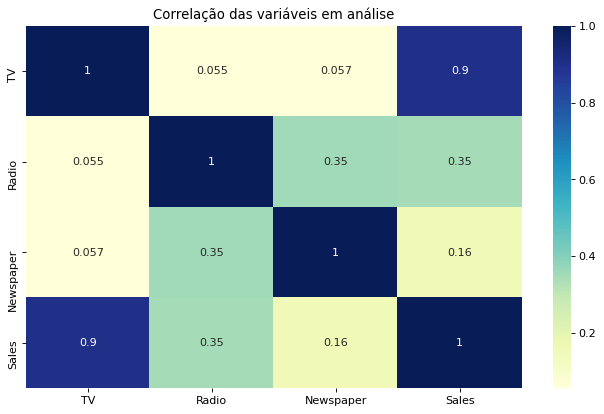

In [8]:
# Matriz de correlação:

plt.figure(figsize=(10, 6), dpi=80)
sns.heatmap(propaganda.corr(), cmap="YlGnBu", annot=True,vmax=1)
plt.title('Correlação das variáveis em análise')
plt.show()

Como o previsto no 'pairplot' a variável 'TV' tem uma correlação positiva com 'Sales' (Uma correlação de 0.9).Portanto, como estamos trabalhando com uma regressão simples, vamos estimar um modelo onde a variável depedente(y) é "Sales", e a variável explicativa(x) é TV. 

### Estimação do Modelo

###### A estimação:

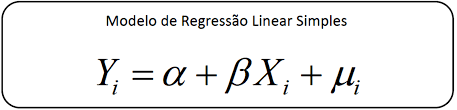

- Y corresponde a variável dependete
- a (alfa) é o intercepto da análise
- b (beta) é o coeficiente de inclinação da reta
- x é a variável explicativa da análise
- u corresponde ao termo de erro

O nosso modelo:

- Y^ = a + b1.TV


###### Para dar início ao modelo vou separar a minha variável X e Y

In [9]:
X = propaganda['TV'] #Minha variável explicativa 
y = propaganda['Sales'] # Variável Dependente

#### Divisão do modelo para treino e teste

Nessa etapa vou precisa dividir a minha variável X e Y em duas. Duas de treino (X_train e y_train), e duas de teste(X_test e X_test). Diversos livros de DS falam de boas práticas, e que uma delas é separar 70% do seu banco de dados para ser treinado, e o restante (30%) ser utilizado para teste.

In [10]:
#A 'library' abaixo vai nos ajudar nesse processo de divisão
from sklearn.model_selection import train_test_split
X_train, x_test, y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


#### Construindo um Modelo Linear Simples

In [13]:
import statsmodels.api as sm #lib necessária para rodar uma OLS (Ordinary Least Squares)

In [91]:
#Para adicionar o intercepto no modelo (Y)
X_sm_train = sm.add_constant(X_train)

#Para fazer o 'fit' usando 'OLS'
lr = sm.OLS(y_train, X_sm_train).fit()

###### Apresentando os parâmetros do modelo:
Abaixo temos o intercepto e o parâmetro de inclinação (Beta).

In [15]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

###### Apresentando as demais estatisticas do modelo:

In [16]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.52e-52
Time:                        19:22:44   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

##### Observações para serem feitas no modelo:

- R-squared(R-quadrado): Apresentou um valor de 0.816, ou seja, o modelo estimado tem um poder de predição de 81%;
- Os P_values do modelo são estatisticamente significante a 95% de confiança;
- F Statistic é estatisticamente significante, portanto temos um modelo.

#### Depois de toda a predição, o modelo ficou assim:

###### Sales = 6.9487 (intercepto) + 0.0545 (beta).TV(valor da variável)

Vamos plotar um gráfico para verificar como ficou a nossa linha de regressão, e como os values se distribuiram em cima do 
fitted value (Valor esperado)

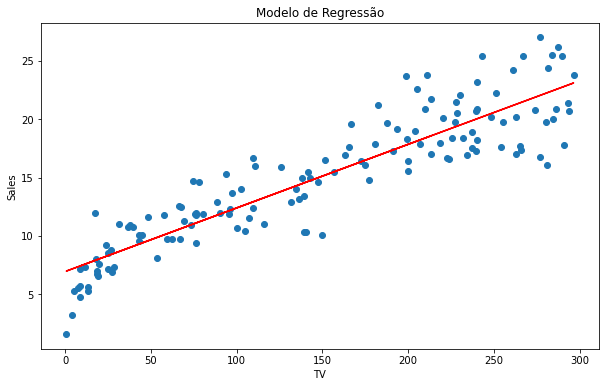

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r')
plt.title('Modelo de Regressão')
plt.show()

## Verificar a Normalidade dos Erros

Para ter a certeza que estamos trabalhando com um bom modelo, precisamos verificar a normalidade dos resíduos. Essa verificação é necessária para validação dos testes de hipóteses do modelo, ou seja, caso os resíduos sejam aderentes a normalidade o teste F é válido no nosso. 

In [18]:
y_pred_train = lr.predict(X_sm_train)
residuo = (y_train - y_pred_train)
residuo.describe()

count    1.400000e+02
mean     2.334640e-15
std      2.407028e+00
min     -6.159676e+00
25%     -1.603752e+00
50%     -2.144479e-02
75%      1.635356e+00
max      5.902167e+00
dtype: float64

<Figure size 432x288 with 0 Axes>

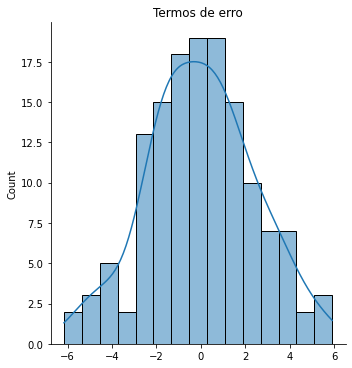

In [19]:
plt.figure()
sns.displot(residuo, bins=15, kde=True)
plt.title('Termos de erro')
plt.show()

Visualmente os resíduos parecem ser normais/normalidade, mas para garantir estatísticamente vamos realizar um teste de: 
###### Shapiro-Wilk

Algumas cosiderações do Shapiro-Wilk:
- O teste serve para verificar a normalidade dos dados;
- p_value >=0.05: Os resíduos seguem uma distribuição normal;
- p_value < 0.05: Os resíduos não seguem uma distribuição normal.

##### Teste de Shapiro-Wilk

In [32]:
from scipy import stats

statistic, pvalue= stats.shapiro(residuo)

#Verificando se o p_value é maior que 0.05
pvalue>0.05

True

Nosso modelo tem um p_value maior que 0.05, portanto os resíduos são aderentes a normalidade.

# Regressão Linear Múltipla

Neste momento eu vou realizar a análise da variável dependete, e todas as minhas variáveis independetes. E é justamente por esse motivo que essa técnica se diferencia da técnica simples de regressão. Vamos avaliar qual é a influência de todas as variáveis de channel com relação as vendas

In [21]:
#Separando as minhas variáveis dependentes das independentes

X2 = propaganda[['TV', 'Radio', 'Newspaper']].values
y2 = propaganda['Sales'].values

Assim como no modelo acima, vou separar uma amostra de treino e teste:

In [22]:
from sklearn.model_selection import train_test_split
X_train2, x_test2, y_train2,y_test2 = train_test_split(X2, y2, train_size=0.7, test_size=0.3, random_state=0)

In [33]:
train2 = sm.add_constant(X_train2) #adicionando o intercepto

LM = sm.OLS(y_train2, train2).fit()

In [24]:
print(LM.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     494.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           6.39e-73
Time:                        19:22:49   Log-Likelihood:                -253.79
No. Observations:                 140   AIC:                             515.6
Df Residuals:                     136   BIC:                             527.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6692      0.339     13.782      0.0

### Conclusões:

- O modelo atual é melhor do que o anterior, deduzo isso devido ao R-quadrado Ajustado, que tem justamente o propósito de comparação.
- Enquanto o R quadrado ajustado do modelo antigo apresentou um valor de 0.81, o modelo múltiplo apresentou um R-quadrado ajustado de 0.91;
- O modelo múltiplo representa um R-quadrado de 0.91, isso significa que esse é o poder preditivo no meu modelo;
- O modelo tem um problema, um nos betas não passou no teste de p_value, portanto não é estatisticamente significante.

In [25]:
#A variável Newspaper não possui um P_value estatisticamente significante, conforme descrito abaixo:

for i in LM.pvalues:
     print(i < 0.05)
     print(i)

#Nesse caso vamos excluir a variável Newspaper, já que não passou no teste.

True
1.3700967632044024e-27
True
4.562525025722548e-70
True
7.948411878032605e-25
False
0.7536800318623915


## Novo modelo sem a variável Newspaper

In [26]:
X_new = propaganda[['TV', 'Radio']].values
y_new = propaganda['Sales'].values

In [27]:
from sklearn.model_selection import train_test_split
X_trainew, x_testnew, y_trainew,y_testnew = train_test_split(X_new, y_new, train_size=0.7, test_size=0.3, random_state=0)

In [28]:
trainnew = sm.add_constant(X_trainew)

LMN = sm.OLS(y_trainew, trainnew).fit()

In [29]:
print(LMN.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     746.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           2.17e-74
Time:                        19:22:50   Log-Likelihood:                -253.84
No. Observations:                 140   AIC:                             513.7
Df Residuals:                     137   BIC:                             522.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7020      0.321     14.633      0.0

In [34]:
for i in LMN.pvalues:
     print(i < 0.05)
     print(i)

True
8.699885305227561e-30
True
5.5506820133641105e-71
True
1.1678354839141164e-26


### Análise do Modelo:
- Por mais que o R-quadrado permaneça o mesmo, quando olhamos para o R-ajustado conseguimos identificar que é melhor do que o modelo antigo, portanto esse será o nosso modelo final.
- A estatística F passou, o que me indica que pelo menos um beta é estatisticamente significante;
- Todos os P_values são estatiticamente significantes (No alfa e Beta)

## Normalidade dos Resíduos

Fazendo o predict, e analisando os resíduos

In [83]:
y_pred_train2 = LMN.predict(trainnew)
residuo2 = (y_trainew - y_pred_train2)

<Figure size 432x288 with 0 Axes>

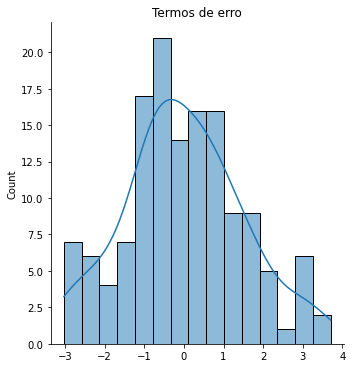

In [84]:
plt.figure()
sns.displot(residuo2, bins=15, kde=True)
plt.title('Termos de erro')
plt.show()

In [93]:
stati, p_value2 = stats.shapiro(residuo2)
p_value2 >0.05

True

In [115]:
p_value2

0.2302713543176651

### Conclusão:

Os resíduos passaram no teste de Shapiro-Wilk, portanto temos um modelo.